### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.options.mode.chained_assignment = None

### Loading data

In [4]:
raw_dataset = pd.read_csv("turboaz.csv")

In [5]:
df = raw_dataset[['Buraxilish ili', 'Yurush', 'Qiymet']]

In [6]:
df['Yurush'] = df['Yurush'].str.replace("km", "").str.replace(' ', '')
df['Yurush'] = pd.to_numeric(df['Yurush'])

In [7]:
df['Qiymet'] = df['Qiymet'].str.replace('AZN', '') 

In [8]:
df_dollars = df[df['Qiymet'].str.contains("\$")]

In [9]:
df_dollars['Qiymet'] = df_dollars['Qiymet'].str.replace(r'\$', '', regex=True)

In [10]:
df_dollars['Qiymet'] = pd.to_numeric(df_dollars['Qiymet'])
df_dollars['Qiymet'] = df_dollars['Qiymet']*1.7

In [11]:
df.loc[df_dollars.index, 'Qiymet'] = df_dollars['Qiymet']

In [12]:
df['Qiymet'] = pd.to_numeric(df['Qiymet'])
df['Buraxilish ili'] = pd.to_numeric(df['Buraxilish ili'])

In [13]:
x1=df['Yurush']
x2=df['Buraxilish ili']
y=df['Qiymet']

In [14]:
df.head()

,Buraxilish ili,Yurush,Qiymet
0,1999,366000,12500.0
1,2014,102000,53550.0
2,2002,469700,11700.0
3,1998,556680,9700.0
4,2000,300000,12700.0


### Visualization

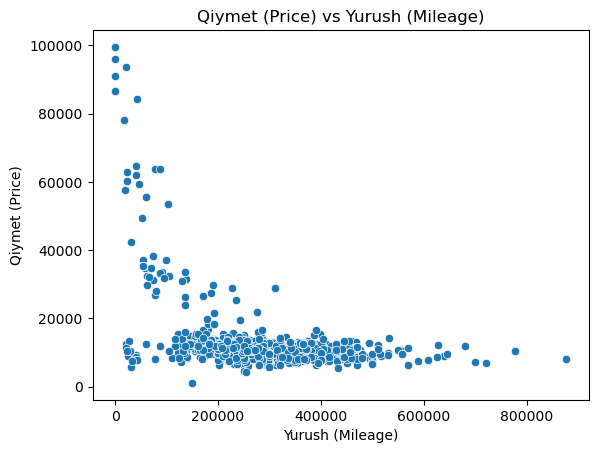

In [15]:
sns.scatterplot(data=df, x="Yurush", y="Qiymet")
plt.title("Qiymet (Price) vs Yurush (Mileage)")
plt.xlabel("Yurush (Mileage)")
plt.ylabel("Qiymet (Price)")
plt.show()

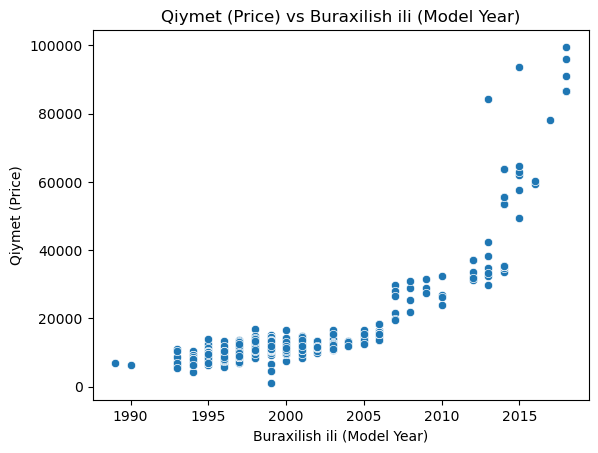

In [16]:
sns.scatterplot(data=df, x="Buraxilish ili", y="Qiymet")
plt.title("Qiymet (Price) vs Buraxilish ili (Model Year)")
plt.xlabel("Buraxilish ili (Model Year)")
plt.ylabel("Qiymet (Price)")

plt.show()

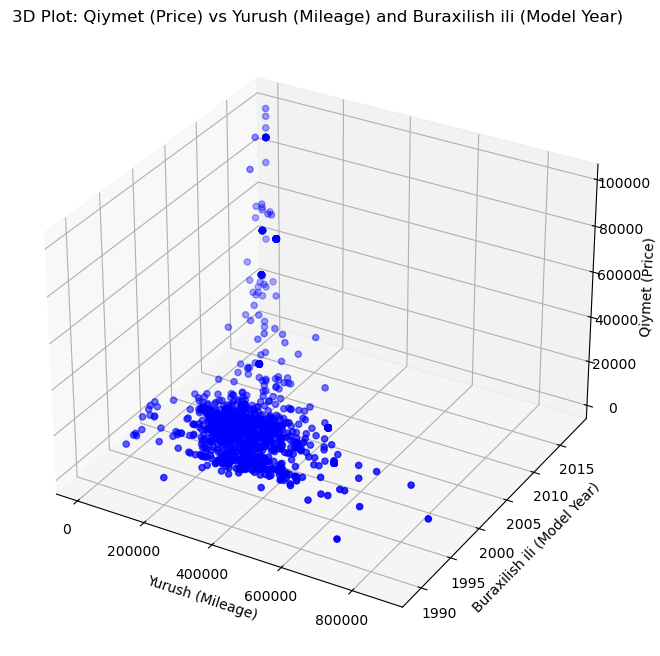

In [17]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Yurush'], df['Buraxilish ili'], df['Qiymet'], c='blue', marker='o')

ax.set_title('3D Plot: Qiymet (Price) vs Yurush (Mileage) and Buraxilish ili (Model Year)')
ax.set_xlabel('Yurush (Mileage)')
ax.set_ylabel('Buraxilish ili (Model Year)')
ax.set_zlabel('Qiymet (Price)')

plt.show()

## Implementation of Linear Regression from scratch

### Calculate cost function. Implement a function which returns cost given true y values, x values and coefficients.

In [18]:
# STEP 1: To be able to calculate hypothesis function, we need to assign thetas - weights randomly). I put best ones I could get
w0 = 1
w1 = -0.005 #from the graph, we see that Mileage has a little effect and price is decreasing if it is high
w2 = 8      #from the graph, we see that Year effects price a lot and price is increasing if it is new

# I convert it to numpy array for making calculation easier

W = np.array([w0,w1,w2], np.float64)

In [19]:
# STEP 2: To be able to multiply weights and features, we need to pprepare a matrix for features and transpose
n = df.shape[0]
x0 = np.ones(n)
X = np.array([x0,x1,x2]).T

In [20]:
# STEP 3: Now, we can define our hypothesis function:
def hypothesis_f (w,x):
    return x.dot(w)

In [21]:
# STEP 4: Time to calculate cost:
def cost_function(predictions, labels):
    difference = labels - predictions
    return np.sum(difference**2)/(2*n)

In [22]:
predictions = hypothesis_f (W,X)
cost = cost_function(predictions, y)
print(f"The cost of the function with weights (1,-0.005, 8) before normalization is: {cost}")

The cost of the function with weights (1,-0.005, 8) before normalization is: 88244799.08969031


### Normalize data using Z score normalization

In [23]:
#STEP 1: Define a function for normalization
def normalization_f (x):
    return (x-x.mean())/x.std()

In [24]:
x1_normal = normalization_f(x1)
x2_normal = normalization_f(x2)
y_normal = normalization_f(y)

In [25]:
#STEP 2: Let us calculate the cost again
W_normal = np.array([0,-0.05,1])
X_normal = np.array([x0,x1_normal,x2_normal]).T
predictions = hypothesis_f (W_normal,X_normal)
cost_normal = cost_function(predictions, y_normal)
print(f"The cost of the function with weights (0,-0.05,1) is after normalization : {cost_normal}")

The cost of the function with weights (0,-0.05,1) is after normalization : 0.11719415155342021


### Implement gradient descent algorithm to minimize the cost function

In [26]:
# First, we define necessary parameters
weights = np.array([0,-0.05,1])
learning_rate = 0.001
iterations = 10000
costs = []

In [27]:
# Let us define a function for gradient descent:
def gradient_descent(x,y,w):
    for i in range(iterations):
        difference = hypothesis_f(w,x)-y
        gradient = (np.dot(x.T,difference))/n
        w -= learning_rate * gradient
        cost = cost_function(hypothesis_f(w,x), y)
        costs.append(cost) #to monitor how the cost changes
        if ((i%1000)==0):
            print(f"iteration {i} | cost: {round(cost, 3)}")
    return w, costs

In [28]:
new_weights, costs = gradient_descent(X_normal,y_normal,weights)

iteration 0 | cost: 0.117
iteration 1000 | cost: 0.108
iteration 2000 | cost: 0.107
iteration 3000 | cost: 0.107
iteration 4000 | cost: 0.106
iteration 5000 | cost: 0.106
iteration 6000 | cost: 0.106
iteration 7000 | cost: 0.106
iteration 8000 | cost: 0.106
iteration 9000 | cost: 0.106


In [29]:
new_weights

array([ 1.69976162e-14, -9.18908616e-02,  8.32320370e-01])

### Plot graph of Cost function and describe how it changes over iterations

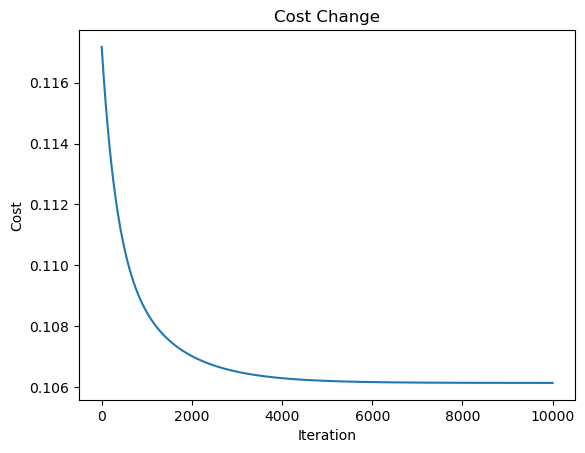

In [30]:
plt.plot(costs)
plt.title('Cost Change')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

### Plot points of Y (Qiymet) and X1 (Buraxilish ili) and draw a line of predictions made with parameters you got from gradient descent

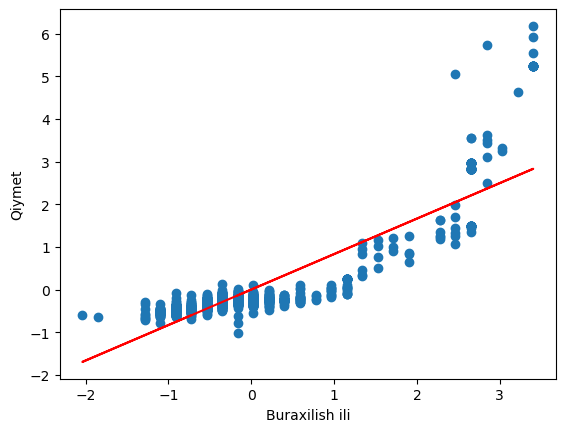

In [31]:
plt.scatter(x2_normal, y_normal)
plt.xlabel('Buraxilish ili')
plt.ylabel('Qiymet')
prediction_year = new_weights[0] + new_weights[2] * x2_normal
plt.plot(x2_normal, prediction_year, color='red')
plt.show()

### Plot points of Y (Qiymet) and X2 (Yurush) and draw a line of predictions made with parameters you got from gradient descent.

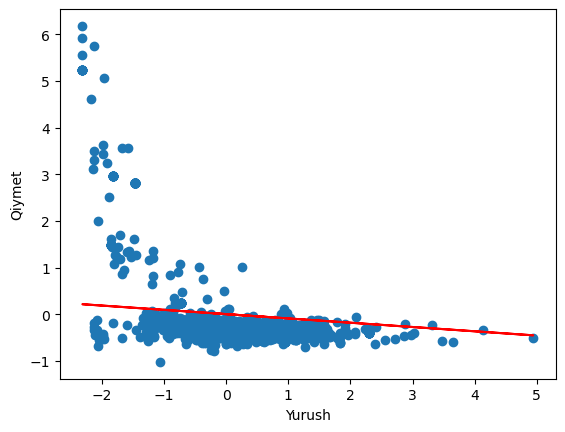

In [32]:
plt.scatter(x1_normal, y_normal)
plt.xlabel('Yurush')
plt.ylabel('Qiymet')
prediction_milage = new_weights[0] + new_weights[1] * x1_normal
plt.plot(x1_normal, prediction_milage, color='red')
plt.show()

### Plot 3D graph of points of Y (Qiymet), X1, X2 and predicted Y (Qiymet) using the same X1 and X2. It should look like this (blue points are true values, red points are predicted values):

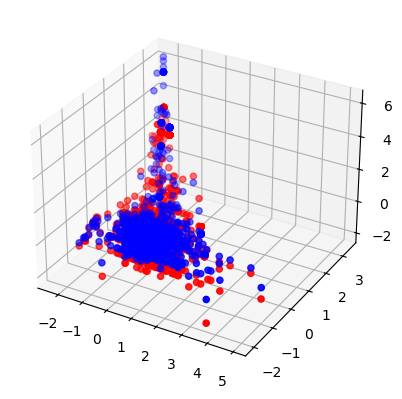

In [33]:
ax = plt.axes(projection='3d')
predictions = new_weights[0] + new_weights[1] * x1_normal + new_weights[2] * x2_normal
ax.scatter3D(x1_normal, x2_normal, y_normal, color='blue')
ax.scatter(x1_normal, x2_normal, predictions, color='red')
plt.show()

### Predict the prices of new cars by using your parameters and compare your predictions with the actual prices.

In [34]:
def predict_f(x):
    x1_new, x2_new = x
    x1_new = (x1_new - x1.mean())/x1.std()
    x2_new = (x2_new - x2.mean())/x2.std()
    prediction = new_weights[0] + new_weights[1] * x1_new + new_weights[2] * x2_new
    return prediction * y.std() + y.mean()

In [35]:
# Car 1 { Qiymet: 11500}
car_1 = [240000,2000]
predicted_val_1 = round(predict_f(car_1))
print(f"My prediction for car_1 is {predicted_val_1} but actual price is 11500. \nDifference is {predicted_val_1 - 11500}.")

My prediction for car_1 is 15815 but actual price is 11500. 
Difference is 4315.


In [36]:
#Car 2 {Yurush: 415558, Buraxilish ili: 1996, Qiymet: 8800}
car_2 = [415558,1996]
predicted_val_2 = round(predict_f(car_2))
print(f"My prediction for car_2 is {predicted_val_2} but actual price is 8800. \nDifference is {predicted_val_2 - 8800}.")

My prediction for car_2 is 5462 but actual price is 8800. 
Difference is -3338.


## Linear Regression using library

In [37]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_normal[:, 1:], y_normal)

LinearRegression()

In [38]:
def predict_lr_lib(x):
    x1_new, x2_new = x
    x1_new = (x1_new - x1.mean())/x1.std()
    x2_new = (x2_new - x2.mean())/x2.std()
    prediction = model.predict(np.array([[x1_new, x2_new]]))
    return prediction[0] * y.std() + y.mean()

In [43]:
print(f"My prediction for car_1 is {predicted_val_1} but library gives {round(predict_lr_lib(car_1))}. \nDifference is {predicted_val_1 - round(predict_lr_lib(car_1))}.")

My prediction for car_1 is 15815 but library gives 15821. 
Difference is -6.


In [44]:
print(f"My prediction for car_2 is {predicted_val_2} but library gives {round(predict_lr_lib(car_2))}. \nDifference is {predicted_val_2 - round(predict_lr_lib(car_2))}.")

My prediction for car_2 is 5462 but library gives 5454. 
Difference is 8.


## Linear Regression using normal equation

In [45]:
def lr_normal_equation(X,y): 
    multiplication = np.matmul(X.T,X)
    inverse = np.linalg.inv(multiplication)
    return np.matmul(np.matmul(inverse, X.T),y)


In [581]:
weights_with_norm_eq = lr_normal_equation(X_normal,y_normal)
print(f"Weights with normal equation: {weights_with_norm_eq}")

Weights with normal equation: [ 1.69135539e-14 -9.33437483e-02  8.30867464e-01]
